In [2]:
%matplotlib inline

import random
import torch
from d2l import torch as d2l

使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。

In [14]:
def synthetic_data(w, b, num_examples):  #给定w和b，要生成num_examples个样本
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))  #生成一些随机数
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


#调用函数
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features

tensor([[ 1.6481, -1.0056],
        [-0.8403,  0.2607],
        [-0.1158,  1.5057],
        ...,
        [ 1.2077,  0.5148],
        [-0.0148,  1.7207],
        [-0.0273, -1.3734]])

In [35]:
print('features:', features,'\nlabel:', labels)
features[:, 1]

features: tensor([[ 1.6481, -1.0056],
        [-0.8403,  0.2607],
        [-0.1158,  1.5057],
        ...,
        [ 1.2077,  0.5148],
        [-0.0148,  1.7207],
        [-0.0273, -1.3734]]) 
label: tensor([[ 1.0908e+01],
        [ 1.6383e+00],
        [-1.1673e+00],
        [ 7.6761e+00],
        [-1.9437e+00],
        [ 3.8197e+00],
        [ 6.3912e+00],
        [ 1.2487e+01],
        [-1.1404e+00],
        [ 4.8965e+00],
        [ 6.4188e+00],
        [ 5.6281e+00],
        [ 2.1565e+00],
        [-4.3388e+00],
        [-2.4191e+00],
        [ 1.2991e+00],
        [-2.6185e+00],
        [-2.4177e+00],
        [ 6.4407e+00],
        [ 1.4940e+00],
        [ 6.9050e-01],
        [ 7.1729e+00],
        [-1.1999e+00],
        [ 6.0048e+00],
        [-8.9353e-01],
        [ 7.0904e+00],
        [-1.2640e+00],
        [ 2.7686e+00],
        [ 3.0495e+00],
        [ 8.4277e+00],
        [ 1.0138e+00],
        [ 3.6457e+00],
        [ 8.0980e+00],
        [ 3.7558e+00],
        [-5.3115e-

tensor([-1.0056e+00,  2.6066e-01,  1.5057e+00, -4.6705e-01,  1.3858e+00,
         5.3218e-01, -1.3630e+00, -1.9699e+00,  1.5298e+00, -3.6324e-01,
        -8.3141e-01, -1.5508e+00,  1.1938e+00,  1.6221e+00,  1.4770e+00,
        -2.9795e-02,  2.0468e+00,  1.4529e+00, -4.3674e-01,  5.1828e-02,
        -7.6500e-02, -7.9294e-01,  8.9323e-01, -6.3995e-01,  1.1627e+00,
        -4.8081e-01,  5.3800e-01,  7.1691e-01,  1.0413e+00, -8.6337e-01,
         8.8118e-01, -5.9694e-01, -5.4266e-01,  1.8253e-01,  1.4032e+00,
         1.0602e+00,  3.3253e-01, -4.3550e-01,  3.5484e-01,  4.8696e-01,
         9.5887e-01,  1.3491e+00,  8.5515e-01,  3.8859e-01, -1.8784e-01,
         6.5459e-01, -1.1236e+00,  1.6013e+00, -3.0523e-02,  1.5508e+00,
         7.7273e-01, -5.4422e-01, -1.1033e+00,  9.0277e-01,  1.4291e+00,
        -1.1134e+00, -1.1588e-01,  9.9390e-01,  1.8647e+00, -5.0439e-02,
         1.0680e-01,  7.7353e-01, -8.1245e-01,  8.6643e-01,  1.4170e+00,
        -3.8350e-01, -5.8619e-02, -5.1262e-01,  2.3

在深度学习训练后，需要计算每个epoch得到的模型的训练效果的时候，一般会用到detach() item() cpu() numpy()等函数。
1.detach() 作用：阻断反向传播的。 返回值：Tensor，且经过detach()方法后，变量仍然在GPU上。
2.cpu() 作用：将数据移至CPU中 返回值：Tensor
3.numpy() 该方法主要用于将cpu上的tensor转为numpy数据。
    作用：tensor变量转numpy 返回值：numpy.array()
4.item() 可以获取torch.Tensor的值。返回值为float类型。



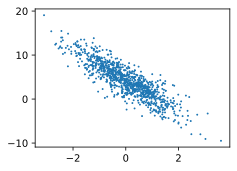

In [81]:
# 用于展示图
d2l.set_figsize() #设置成矢量图
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1); #绘制散点图

#第三个参数是点的直径大小
#d2l.plt.show()

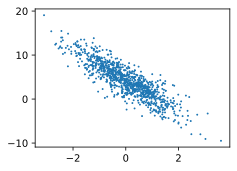

In [82]:
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1); #绘制散点图


3.2.2. 读取数据集
回想一下，训练模型时要对数据集进行遍历，每次抽取一小批量样本，并使用它们来更新我们的模型。


In [83]:
#我们定义一个data_iter函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 每个小批量包含一组特征和标签。
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices) #打乱顺序
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


Python————yield
1.yield的值必须在循环里，因为只有在循环里才能使yield返回值或者具有可迭代的函数里
2.将 yield 看做 return 对待，只是 return 返回一个值，而 yield 返回一个生成器
3.生成器是一种迭代器，这种迭代器只能迭代一次。生成器不会一次性存储所有的值，而是会动态的生成值。

In [84]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 5.0404e-01,  8.0267e-01],
        [ 1.1475e-04,  2.3621e-01],
        [ 1.3756e+00, -1.2159e+00],
        [ 7.5694e-01,  8.6227e-02],
        [ 1.8914e-01,  5.7476e-01],
        [ 1.4220e+00,  1.5162e+00],
        [-3.2982e-02,  6.6368e-01],
        [ 1.6131e+00, -2.1883e+00],
        [-1.2000e+00, -3.7736e-01],
        [ 4.4922e-01,  6.4890e-01]]) 
 tensor([[ 2.4832],
        [ 3.3978],
        [11.0871],
        [ 5.4174],
        [ 2.6271],
        [ 1.8803],
        [ 1.8792],
        [14.8692],
        [ 3.0848],
        [ 2.8982]])


In [85]:
#3.2.3. 初始化模型参数  w和b
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True) #需要计算梯度 均值为0，方差为0.01
b = torch.zeros(1, requires_grad=True)  #标量 0

在初始化参数之后，我们的任务是更新这些参数，直到这些参数足够拟合我们的数据。 每次更新都需要计算损失函数关于模型参数的梯度。 有了这个梯度，我们就可以向减小损失的方向更新每个参数。

#3.2.4. 定义模型
我们只需计算输入特征和模型权重的矩阵-向量乘法后加上偏置。 注意，上面的是一个向量，而是一个标量。 回想一下 2.1.3节中描述的广播机制： 当我们用一个向量加一个标量时，标量会被加到向量的每个分量上。

In [86]:
def linreg(X, w, b):  #定义模型
    """线性回归模型"""
    return torch.matmul(X, w) + b

3.2.5. 定义损失函数
因为需要计算损失函数的梯度，所以我们应该先定义损失函数。

In [87]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
    #预测值 真实值
    #没做均值

3.2.6. 定义优化算法
实现小批量随机梯度下降更新。 该函数接受模型参数集合、学习速率和批量大小作为输入。每 一步更新的大小由学习速率lr决定。 因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（batch_size） 来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [88]:
def sgd(params, lr, batch_size):  #params是一个list，包含w和b ，lr学习率
    """小批量随机梯度下降"""
    with torch.no_grad():#不需要计算梯度
        for param in params:
            param -= lr * param.grad / batch_size #这里求均值，损失函数没求   .grad求梯度
            param.grad.zero_() #梯度设置为0

 在每次迭代中，我们读取一小批量训练样本，并通过我们的模型来获得一组预测。 
 计算完损失后，我们开始反向传播，存储每个参数的梯度。 
 最后，我们调用优化算法sgd来更新模型参数。


概括一下，我们将执行以下循环：
1.初始化参数
2.重复以下训练，直到完成：
（1）计算梯度
（2）更新参数

在每个迭代周期（epoch）中，我们使用data_iter函数遍历整个数据集， 并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。 
这里的迭代周期个数num_epochs和学习率lr都是超参数，分别设为3和0.03。 设置超参数很棘手，需要通过反复试验进行调整。

In [89]:
lr = 0.03 #学习率
num_epochs = 3 #扫描三遍
net = linreg    #模型
loss = squared_loss

for epoch in range(num_epochs): #扫描一遍数据
    for X, y in data_iter(batch_size, features, labels): 
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()  #求和 算梯度
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037973
epoch 2, loss 0.000141
epoch 3, loss 0.000052


In [90]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0001, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0013], grad_fn=<RsubBackward1>)
